<a href="https://www.kaggle.com/code/saymoonlee/eda-ml-salary-based-on-country?scriptVersionId=138361563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-based-on-country-and-race/Salary_Data_Based_country_and_race.csv


In [2]:
df = pd.read_csv('../input/salary-dataset-based-on-country-and-race/Salary_Data_Based_country_and_race.csv')
print('First 10 rows of dataset:\n') 
df.head()


First 10 rows of dataset:



,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [3]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (6704, 9)


In [4]:
# Remove unwanted columns
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


In [6]:
# Based on the outcome above, there are NULL data. 
# As the number of records that contained NULL data is minimum, we will just remove the rows.
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.0+ KB


In [8]:
# Now all the data is clean (from null or nan data), let's see some information on continuous data
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [9]:
# Let's look at category data... first we would like to know each column, how many unique values that we have
# Detect if is categorical data, count the number of unqiue value.
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique()
        print(f'{col}: {unique_count}')

Gender: 3
Education Level: 7
Job Title: 191
Country: 5
Race: 10


In [10]:
# Explore the categorical data, if there is any typo error
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {unique_count}')
        print(df[col].unique())

Gender: 10
['Male' 'Female' 'Other']
Education Level: 10
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title: 10
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 

In [11]:
# Based on data above, some of the data in "education level" column should be cleaned up Education Level: 10
#"Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree",'High School' 'phD'
# PhD & phD = PhD
# Bachelor's & Bachelor's Degree = Bachelor's
# Master's & Master's Degree = Master's

df['Education Level'] = df['Education Level'].replace('phD', 'PhD')
df['Education Level'] = df['Education Level'].replace('Bachelor\'s Degree', 'Bachelor\'s')
df['Education Level'] = df['Education Level'].replace('Master\'s Degree', 'Master\'s')

In [12]:
# Check the column again
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [13]:
# Let's have some understanding on different features to salary
# we will use plotly here
import plotly.express as px

fig = px.box(data_frame=df, x='Gender', y='Salary')
fig.show()

In [14]:
fig = px.box(data_frame=df, x='Education Level', y='Salary')
fig.show()

Obviously, education level is one of the major factors in deciding the salary position of a person. PhD has highest salary range, followed by Master's and Bachelor's. Those people with high school qualification has lowest salary range.

In [15]:
fig = px.box(data_frame=df, x='Job Title', y='Salary')
fig.show()

There are too may job titles for this feature, and sample size for some of the job titile is too little (only has 1 or 2 data). 

The proposal is to futher categorize the data into different industry or job level (such as junior executive, senior executive, manager, senior manager, director) during data collection will be more benifitial for analysis.

In [16]:
fig = px.box(data_frame=df, x='Country', y='Salary')
fig.show()

There is no huge differences in salary range for different countries.

In [17]:
fig = px.box(data_frame=df, x='Race', y='Salary')
fig.show()

The salary range are different between difference races, but the range still between Q1:60k to Q3:160k.

In [18]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



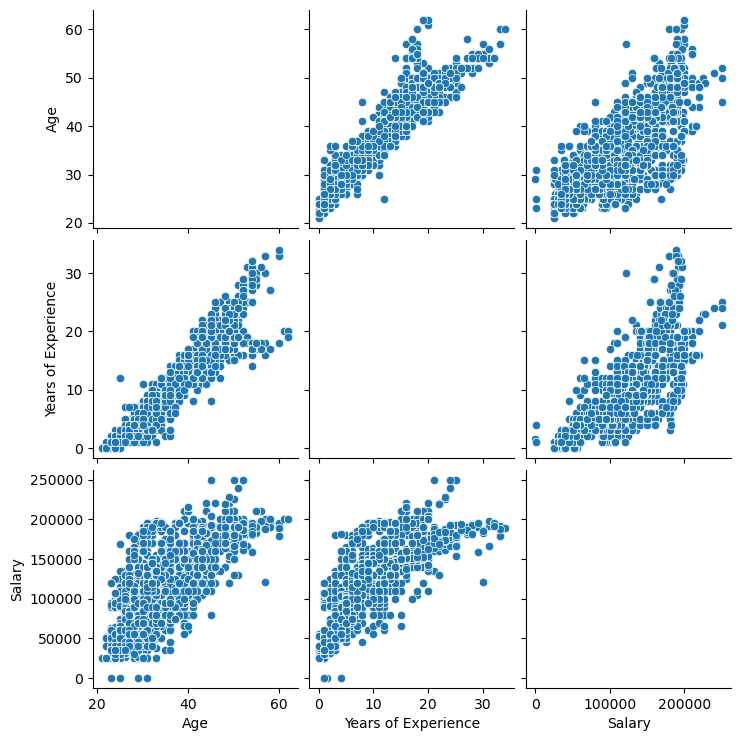

In [19]:
import seaborn as sns
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='scatter', vars=None)

We see the direct correlation betwen years of experience / age against salary. Obviously, these are two important features. Let'see the correlation among all these variables.

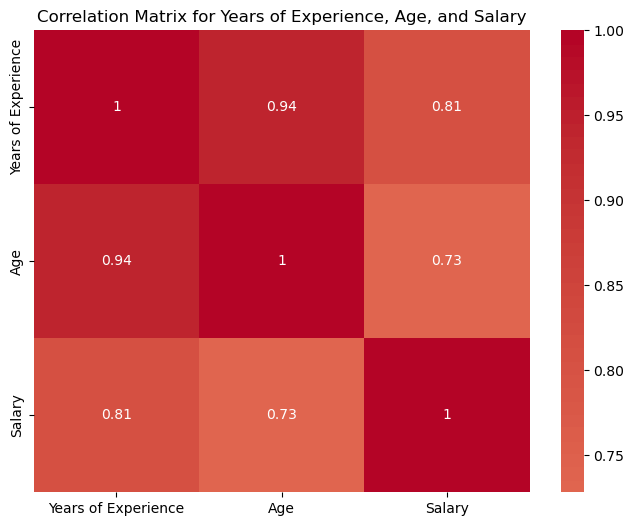

In [20]:
import matplotlib.pyplot as plt
correlation_matrix = df[['Years of Experience', 'Age', 'Salary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Years of Experience, Age, and Salary')
plt.show()

We will use 3 features for this machine learning, running multiple linear regression, including age, years of experience, educational level.

## Data Preprocessing

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

x = df[['Years of Experience', 'Age', 'Education Level']]
y = df['Salary']

x.head()

,Years of Experience,Age,Education Level
0,5.0,32.0,Bachelor's
1,3.0,28.0,Master's
2,15.0,45.0,PhD
3,7.0,36.0,Bachelor's
4,20.0,52.0,Master's


In [22]:
# Define the order of education level 
order_education_level = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']


# Define the Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['Years of Experience','Age']),  
        ('ord', OrdinalEncoder(categories=[order_education_level]),['Education Level'])
    ])

# Get the feature names
feature_names = x.columns

# Fit and transform the data
x_preprocessed = preprocessor.fit_transform(x)

x2 = pd.DataFrame(x_preprocessed, columns=feature_names)
x2.head()

,Years of Experience,Age,Education Level
0,-0.510769,-0.213129,1.0
1,-0.840811,-0.738393,2.0
2,1.139440,1.493980,3.0
3,-0.180727,0.312135,1.0
4,1.964544,2.413192,2.0


## Multiple Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
r2_mlr = r2_score(y_test, y_pred)

print('r2 score is:', r2_mlr)

r2 score is: 0.7200639965716973


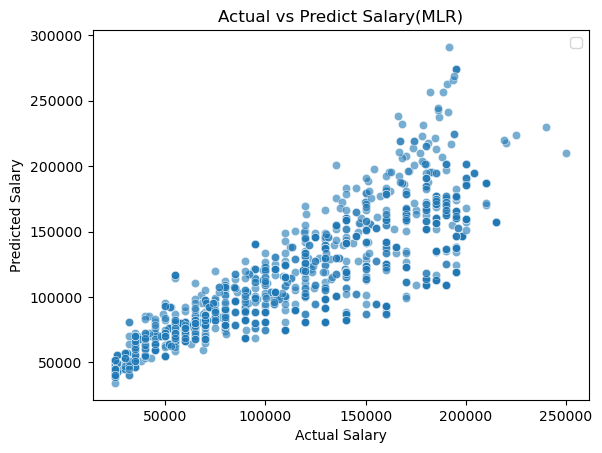

In [24]:
# plot the graph between y_predict and y_test
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predict Salary(MLR)')
plt.legend()
plt.show()

## SVR Model

In [25]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train,y_train)
y_pred = svr_rbf.predict(x_test)
r2_svr = r2_score(y_test, y_pred)

print('r2 score is:', r2_svr)

r2 score is: 0.7488455194571784


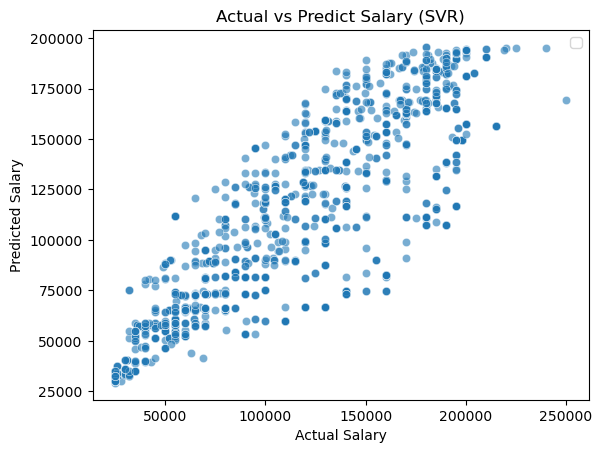

In [26]:
# plot the graph between y_predict and y_test
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predict Salary (SVR)')
plt.legend()
plt.show()

## Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(x_train, y_train)
y_pred = rf_reg.predict(x_test)
r2_rfr = r2_score(y_test, y_pred)

print('r2 score is:', r2_rfr)

r2 score is: 0.8990154245656419


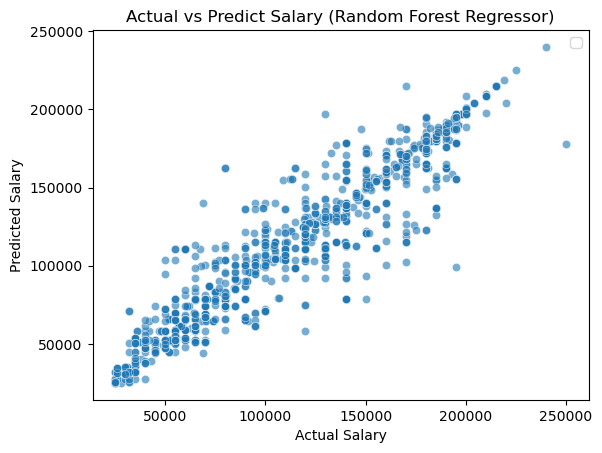

In [28]:
# plot the graph between y_predict and y_test
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predict Salary (Random Forest Regressor)')
plt.legend()
plt.show()

## Report

In [29]:
Report = {'Model' : ['Multiple Linear Regression', 'Support Vector Regression', 'Random Forest Regression'],
         'R2 Score' : [r2_mlr, r2_svr, r2_rfr]}
df_report = pd.DataFrame(Report)
display(df_report)

,Model,R2 Score
0,Multiple Linear Regression,0.720064
1,Support Vector Regression,0.748846
2,Random Forest Regression,0.899015


Random Forest Regressor has highest R2 score compare to Multiple Linear Regression and Support Vector Regression.